In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
import warnings
warnings.filterwarnings("ignore")

In [3]:
data = {'Month': pd.date_range(start='2022-01', periods=24, freq='M'),
        'Sales': [200, 220, 210, 230, 240, 250, 265, 280, 300, 290, 305, 320,
                  330, 340, 350, 365, 375, 390, 400, 420, 430, 440, 455, 470]}
df = pd.DataFrame(data)
df.set_index('Month', inplace=True)

order=(2,1,2):Tells ARIMA to use 2 lags, 1 differencing, and 2 error terms.
forecast(steps=5):predict next 5 periods

In [4]:
# Fit ARIMA model
model = ARIMA(df['Sales'], order=(2, 1, 2))  # p=2, d=1, q=2
model_fit = model.fit()

In [5]:
# Forecast next 5 months
forecast = model_fit.forecast(steps=5)

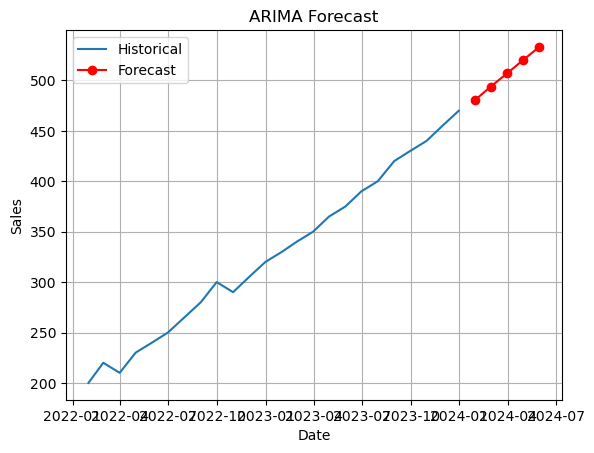

Forecasted Values:
 2024-01-31    480.721745
2024-02-29    493.796312
2024-03-31    506.962572
2024-04-30    520.118933
2024-05-31    533.260848
Freq: ME, Name: predicted_mean, dtype: float64


In [6]:
# Plot
plt.plot(df.index, df['Sales'], label='Historical')
future_dates = pd.date_range(start=df.index[-1] + pd.DateOffset(months=1), periods=5, freq='M')
plt.plot(future_dates, forecast, label='Forecast', color='red', marker='o')
plt.title("ARIMA Forecast")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.legend()
plt.grid(True)
plt.show()

print("Forecasted Values:\n", forecast)